# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {mouse_count}")

Number of unique mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
print("Duplicate mice:")
duplicates


Duplicate mice:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id = duplicates["Mouse ID"].iloc[0]
duplicate_mouse_data = combined_data[combined_data["Mouse ID"] == duplicate_mouse_id]
print("Data for duplicate mouse:")
duplicate_mouse_data

Data for duplicate mouse:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != duplicate_mouse_id]


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice after removing duplicates: {clean_mouse_count}")


Number of unique mice after removing duplicates: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
print("Summary Statistics:")
summary_stats


Summary Statistics:


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Variance', 'var'),
    ('Standard Deviation', 'std'),
    ('SEM', 'sem')
]).round(2)

summary_stats_advanced


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

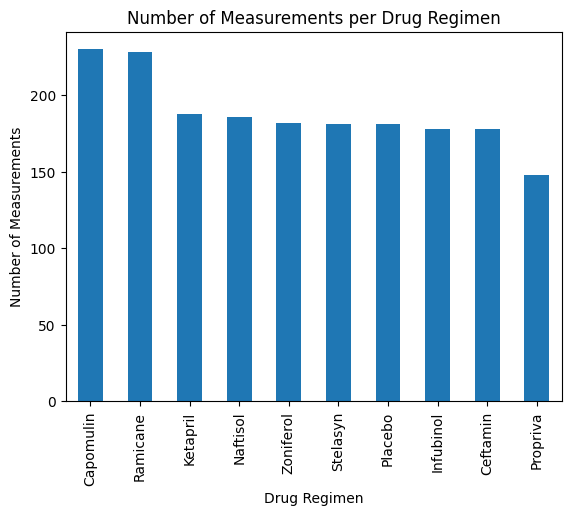

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_data["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar")
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

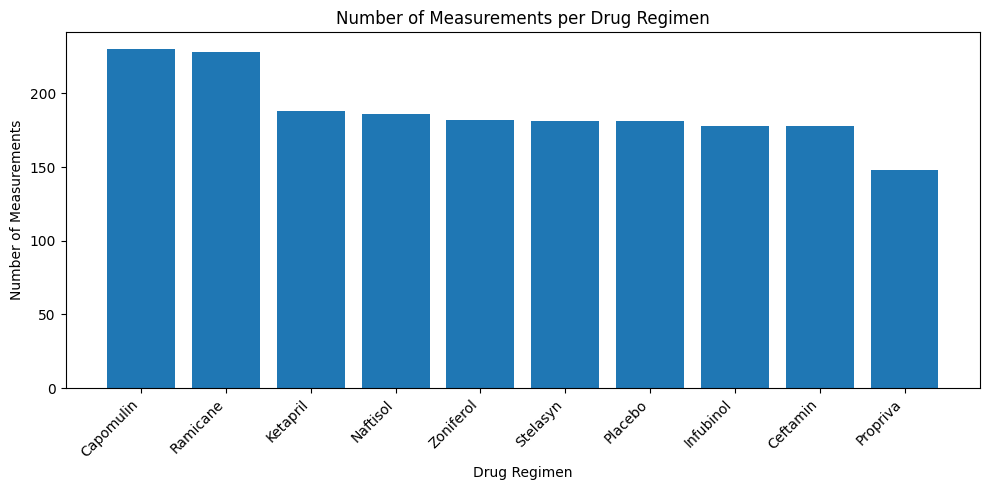

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = clean_data["Drug Regimen"].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(drug_counts.index, drug_counts.values)
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


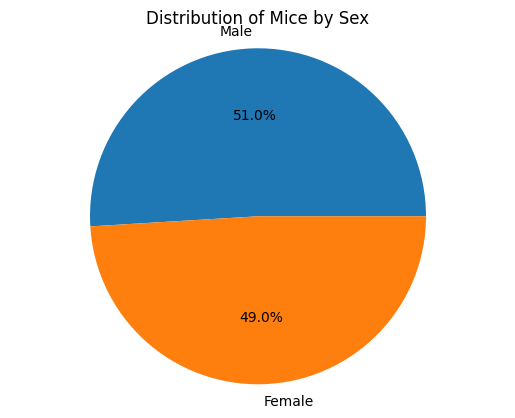

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart

gender_counts = clean_data["Sex"].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Mice by Sex")
plt.axis("equal")
plt.show()



In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volumes = clean_data[clean_data["Drug Regimen"].isin(treatment_regimens)].groupby(["Mouse ID", "Drug Regimen"])["Tumor Volume (mm3)"].last()
final_tumor_volumes


Mouse ID  Drug Regimen
a203      Infubinol       67.973419
a251      Infubinol       65.525743
a275      Ceftamin        62.999356
a411      Ramicane        38.407618
a444      Ramicane        43.047543
                            ...    
y769      Ceftamin        68.594745
y793      Capomulin       31.896238
y865      Ceftamin        64.729837
z578      Ramicane        30.638696
z581      Infubinol       62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = clean_data[clean_data['Drug Regimen'] == treatment]
    tumor_volumes = subset['Tumor Volume (mm3)']

    # add subset to the tumor_vol_data list
    tumor_vol_data.append(tumor_volumes)

    # Calculate quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    # Identify outliers
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"\nOutliers for {treatment}:")
    print(outliers)

# Print the final tumor volume data for verification
for i, treatment in enumerate(treatments):
    print(f"\nTumor volume data for {treatment}:")
    print(tumor_vol_data[i].describe())


Outliers for Capomulin:
1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Outliers for Ramicane:
1814    22.050126
Name: Tumor Volume (mm3), dtype: float64

Outliers for Infubinol:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Outliers for Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Tumor volume data for Capomulin:
count    230.000000
mean      40.675741
std        4.994774
min       23.343598
25%       37.685933
50%       41.557809
75%       45.000000
max       48.158209
Name: Tumor Volume (mm3), dtype: float64

Tumor volume data for Ramicane:
count    228.000000
mean      40.216745
std        4.846308
min       22.050126
25%       36.674635
50%       40.673236
75%       45.000000
max       47.622816
Name: Tumor Volume (mm3), dtype: float64

Tumor volume data for Infubinol:
count    178.000000
mean      52.884795
std        6.567243
min       36.321346
25%       47.312353
50%       51.820584
75%       57.314444
max       72.2267

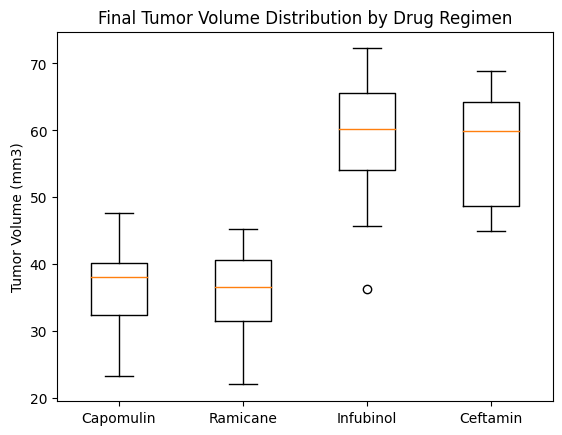

In [31]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.boxplot([final_tumor_volumes[final_tumor_volumes.index.get_level_values("Drug Regimen") == regimen] for regimen in treatment_regimens], labels=treatment_regimens)
plt.title("Final Tumor Volume Distribution by Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

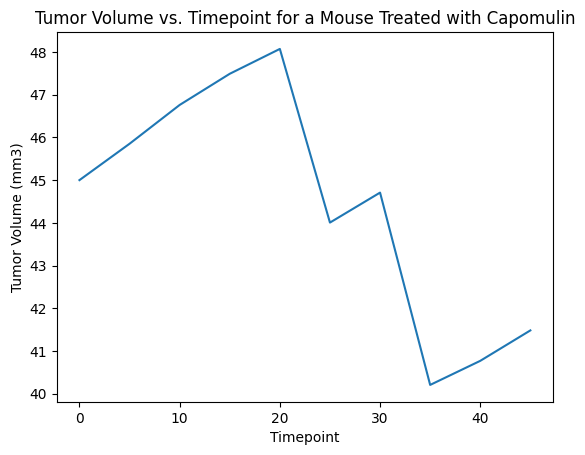

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mouse = clean_data[(clean_data["Drug Regimen"] == "Capomulin") & (clean_data["Mouse ID"] == "l509")]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Timepoint for a Mouse Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


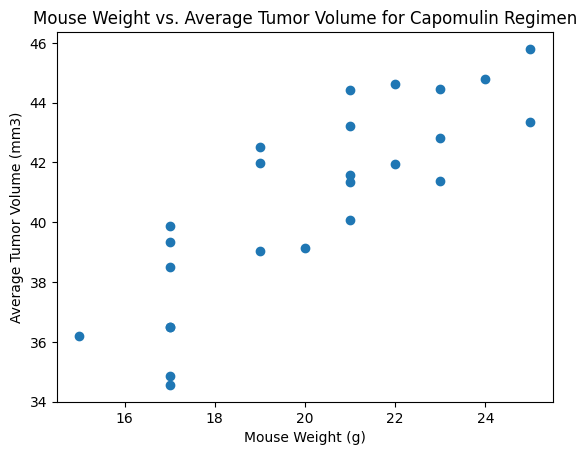

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_data[clean_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()


plt.scatter(mouse_weights, average_tumor_volume)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

Correlation coefficient: 0.8419363424694721
R-squared value: 0.7088568047708723


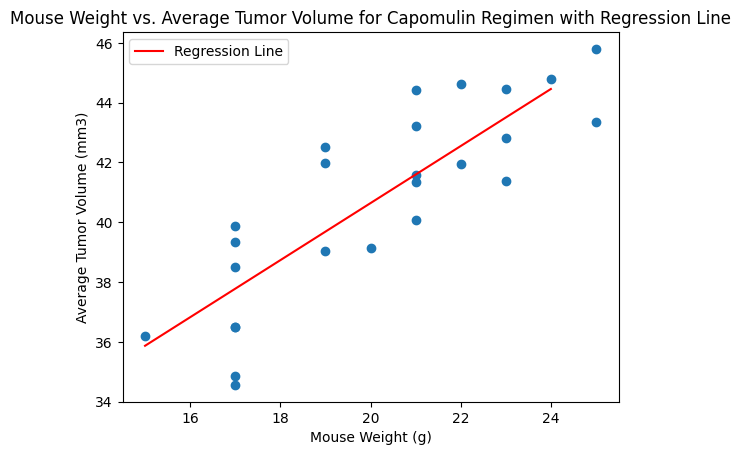

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weights, average_tumor_volume)
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)

print(f"Correlation coefficient: {correlation[0]}")
print(f"R-squared value: {r_value**2}")

# Plot the linear regression line
x_line = range(min(mouse_weights), max(mouse_weights))
y_line = [slope * x + intercept for x in x_line]

plt.scatter(mouse_weights, average_tumor_volume)
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen with Regression Line")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()